In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split


import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics

from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [34]:
#Read the dataset
df=pd.read_csv("D:/Shashank Tripathi Leadics Drive/Personal/UpGrad/Lead Scoring Case Study/Lead Scoring Assignment/Leads.csv")

In [5]:
#Data Exploration
df.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,...,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.0,...,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


In [4]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [6]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
df.info

<bound method DataFrame.info of                                Prospect ID  Lead Number  \
0     7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737   
1     2a272436-5132-4136-86fa-dcc88c88f482       660728   
2     8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727   
3     0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719   
4     3256f628-e534-4826-9d63-4a8b88782852       660681   
5     2058ef08-2858-443e-a01f-a9237db2f5ce       660680   
6     9fae7df4-169d-489b-afe4-0f3d752542ed       660673   
7     20ef72a2-fb3b-45e0-924e-551c5fa59095       660664   
8     cfa0128c-a0da-4656-9d47-0aa4e67bf690       660624   
9     af465dfc-7204-4130-9e05-33231863c4b5       660616   
10    2a369e35-ca95-4ca9-9e4f-9d27175aa320       660608   
11    9bc8ce93-6144-49e0-9f9d-080fc980f83c       660570   
12    8bf76a52-2478-476b-8618-1688e07874ad       660562   
13    88867067-3750-4753-8d33-1c7d1db53b5e       660558   
14    a8531c22-fcf1-48f8-a711-fb5abf98ad87       660553   
15    25f4ac14-ff4b-4cd2

In [68]:
#Nan & Select & blanks in Lead Profile & Lead Quality can be treated as Null Values since these variables do not reveal what kind of lead the respondent is.
# Converting 'Select' values to NaN.
df = df.replace('Select', np.nan)
df.info

<bound method DataFrame.info of                                Prospect ID  Lead Number  \
0     7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737   
1     2a272436-5132-4136-86fa-dcc88c88f482       660728   
2     8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727   
3     0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719   
4     3256f628-e534-4826-9d63-4a8b88782852       660681   
5     2058ef08-2858-443e-a01f-a9237db2f5ce       660680   
6     9fae7df4-169d-489b-afe4-0f3d752542ed       660673   
7     20ef72a2-fb3b-45e0-924e-551c5fa59095       660664   
8     cfa0128c-a0da-4656-9d47-0aa4e67bf690       660624   
9     af465dfc-7204-4130-9e05-33231863c4b5       660616   
10    2a369e35-ca95-4ca9-9e4f-9d27175aa320       660608   
11    9bc8ce93-6144-49e0-9f9d-080fc980f83c       660570   
12    8bf76a52-2478-476b-8618-1688e07874ad       660562   
13    88867067-3750-4753-8d33-1c7d1db53b5e       660558   
14    a8531c22-fcf1-48f8-a711-fb5abf98ad87       660553   
15    25f4ac14-ff4b-4cd2

In [42]:
#To get the percentage of NA or Null values for all the columns
round(100*(df.isnull().sum()/len(df.index)), 1)

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.4
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.5
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.5
Last Activity                                     1.1
Country                                          26.6
Specialization                                   36.6
How did you hear about X Education               78.5
What is your current occupation                  29.1
What matters most to you in choosing a course    29.3
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

In [78]:
#We can drop Lead Profile as it has more than 70% NA values.
data = df.drop(df.loc[:,list(round(100*(df.isnull().sum()/len(df.index)), 2)>70)].columns, 1)

In [79]:
list(set(df.dtypes.tolist()))

[dtype('float64'), dtype('int64'), dtype('O')]

In [80]:
#Checking for columns with numerical variables only
df_num=df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
0,660737,0,0.0,0,0.0,15.0,15.0
1,660728,0,5.0,674,2.5,15.0,15.0
2,660727,1,2.0,1532,2.0,14.0,20.0
3,660719,0,1.0,305,1.0,13.0,17.0
4,660681,1,2.0,1428,1.0,15.0,18.0


In [51]:
#Checking for columns with numerical variables only
df_num.describe(percentiles=[0,.25,.5,.75,.95,.99,.999,1])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
0%,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000,17.000000,20.000000
99%,659592.980000,1.000000,17.000000,1840.610000,9.000000,17.000000,20.000000


In [92]:
#To check for Categorical variables
df_category=df.select_dtypes(include = ['O'])
df_category.head()    

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,...,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,Page Visited on Website,NaN,NaN,NaN,Unemployed,...,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,Email Opened,India,NaN,NaN,Unemployed,...,NaN,No,No,NaN,NaN,02.Medium,02.Medium,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,Email Opened,India,Business Administration,NaN,Student,...,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,...,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,Converted to Lead,India,NaN,Other,Unemployed,...,Might be,No,No,NaN,Mumbai,02.Medium,01.High,No,No,Modified


In [91]:
#To cross check if the customer's are repeated 
sum(data.duplicated(subset = 'Prospect ID')) == 0

True

In [82]:
#Imputing NA values in the Lead Quality column with Not Sure
data['Lead Quality'] = data['Lead Quality'].replace(np.nan, 'Not Sure')

In [83]:
data = data.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score'],1)

In [88]:
#To get the %Nulls in columns
(100*(data.isnull().sum()/len(data.index)), 2)

(Prospect ID                                       0.000000
 Lead Number                                       0.000000
 Lead Origin                                       0.000000
 Lead Source                                       0.389610
 Do Not Email                                      0.000000
 Do Not Call                                       0.000000
 Converted                                         0.000000
 TotalVisits                                       1.482684
 Total Time Spent on Website                       0.000000
 Page Views Per Visit                              1.482684
 Last Activity                                     1.114719
 Country                                          26.634199
 Specialization                                   36.580087
 What is your current occupation                  29.112554
 What matters most to you in choosing a course    29.318182
 Search                                            0.000000
 Magazine                               

In [89]:
#Since Mumbai City has the max mode, we can replace NAN with Mumbai.
data['City'] = data['City'].replace(np.nan, 'Mumbai')

In [93]:
df_category[["Specialization","What is your current occupation"]]

,Specialization,What is your current occupation
0,NaN,Unemployed
1,NaN,Unemployed
2,Business Administration,Student
3,Media and Advertising,Unemployed
4,NaN,Unemployed
5,NaN,NaN
6,Supply Chain Management,Unemployed
7,NaN,NaN
8,IT Projects Management,NaN
9,Finance Management,NaN


In [96]:
#We will impute the Specialization column with either others/ no specialization depending upon if the person's course name is not given in the list or has no specialization as he/she is a student 
data['Specialization'] = data['Specialization'].replace(np.nan, 'Other_specialization')
data['What is your current occupation'] = data['What is your current occupation'].replace(np.nan, 'Unemployed')

In [97]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [98]:
df_category["Tags"].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [99]:
df_category["City"].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [100]:
# We will impute tag column by 'Will revert after reading the email'.
data['Tags'] = data['Tags'].replace(np.nan, 'Will revert after reading the email')
data['City'] = data['City'].replace(np.nan, 'Mumbai')

In [101]:
#To calculate the % of Nulls in each column
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [102]:
df_category["Country"].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Germany                    4
Nigeria                    4
Canada                     4
Kuwait                     4
South Africa               4
Sweden                     3
Ghana                      2
Bangladesh                 2
China                      2
Belgium                    2
Uganda                     2
Philippines                2
Italy                      2
Netherlands                2
Asia/Pacific Region        2
Malaysia                   1
Tanzania                   1
Vietnam                    1
Kenya                      1
Switzerland                1
Indonesia                  1
Liberia       

In [105]:
#To drop NAs from the dataframe
data.dropna(inplace = True)

In [106]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

In [108]:
print(data)

                               Prospect ID  Lead Number  \
1     2a272436-5132-4136-86fa-dcc88c88f482       660728   
2     8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727   
3     0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719   
4     3256f628-e534-4826-9d63-4a8b88782852       660681   
6     9fae7df4-169d-489b-afe4-0f3d752542ed       660673   
10    2a369e35-ca95-4ca9-9e4f-9d27175aa320       660608   
11    9bc8ce93-6144-49e0-9f9d-080fc980f83c       660570   
12    8bf76a52-2478-476b-8618-1688e07874ad       660562   
13    88867067-3750-4753-8d33-1c7d1db53b5e       660558   
14    a8531c22-fcf1-48f8-a711-fb5abf98ad87       660553   
15    25f4ac14-ff4b-4cd2-9c61-b44c85e19c8f       660547   
17    e5c3beca-a0b6-4b3f-8c01-0919fb9ca3f2       660534   
18    82cb5fb0-2d97-4a39-a630-ab5fe2e7f18c       660522   
19    4512c16a-e96a-4459-b9ec-c7d8fe8c4880       660509   
20    c4419c99-b002-408b-a6fd-fa100716592c       660479   
21    fd71ab5b-53b8-4105-9960-efedc44962fa       660478 

EDA

In [110]:
data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

Inference API and Landing Page Submission have 30-35% conversion rate but count of lead originated from them are considerable. Lead Add Form has more than 90% conversion rate but count of lead are not very high. Lead Import are very less in count. To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form

In [113]:
#data_Converted is our target variable. Lets see how many % people converted for this dataset
data_Converted = (sum(data['Converted'])/len(data['Converted'].index))*100
data_Converted

44.22335025380711

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

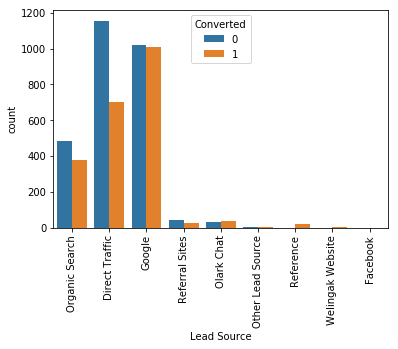

In [117]:
data['Lead Source'] = data['Lead Source'].replace(['google'], 'Google')
data['Lead Source'] = data['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Other Lead Source')
sns.countplot(x = "Lead Source", hue = "Converted", data = data)
xticks(rotation = 90)

Inference Google and Direct traffic generates maximum number of leads. Conversion Rate of reference leads and leads through welingak website is high. To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website

count    4925.000000
mean        4.586599
std         5.074152
min         0.000000
5%          2.000000
25%         2.000000
50%         4.000000
75%         5.000000
90%         8.000000
95%        11.000000
99%        19.000000
max       251.000000
Name: TotalVisits, dtype: float64

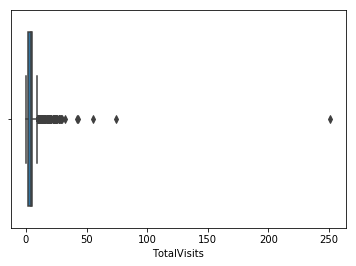

In [119]:
data['TotalVisits'].head()
sns.boxplot(data['TotalVisits'])
data['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

In [120]:
data['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    4925.000000
mean        4.586599
std         5.074152
min         0.000000
5%          2.000000
25%         2.000000
50%         4.000000
75%         5.000000
90%         8.000000
95%        11.000000
99%        19.000000
max       251.000000
Name: TotalVisits, dtype: float64

Sudden jump after 95% calls for outliers treatment.

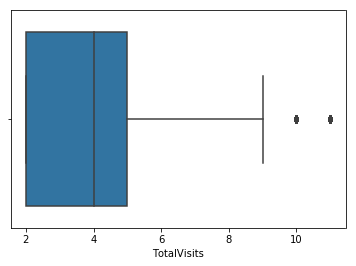

In [122]:
Q1 = data['TotalVisits'].quantile(0.05)
Q3 = data['TotalVisits'].quantile(0.95)
data = data[(data['TotalVisits'] >= Q1) & (data['TotalVisits'] <= Q3)]
sns.boxplot(data['TotalVisits'])

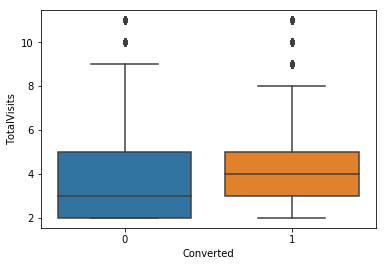

In [123]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = data)

Inference Median for converted and not converted leads are the same. Nothing can be said on the basis of Total Visits.

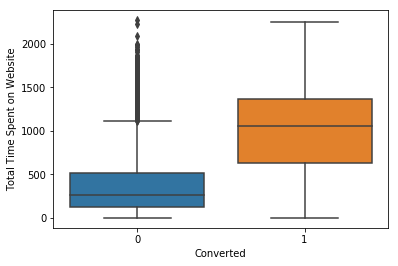

In [125]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = data)

Spending more time on the weblise are more likely to be converted. Website should be made more engaging to make leads spend more time.

In [126]:
data['Page Views Per Visit'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    4485.000000
mean        3.187639
std         1.663524
min         1.000000
5%          1.330000
25%         2.000000
50%         3.000000
75%         4.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        11.000000
Name: Page Views Per Visit, dtype: float64

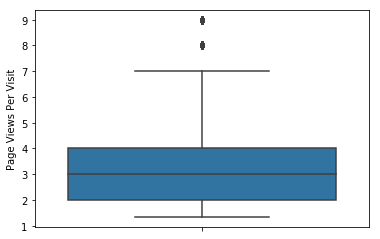

In [127]:
Q1 = data['Page Views Per Visit'].quantile(0.05)
Q3 = data['Page Views Per Visit'].quantile(0.99)
data = data[(data['Page Views Per Visit'] >= Q1) & (data['Page Views Per Visit'] <= Q3)]
sns.boxplot(y=data['Page Views Per Visit'])

Inference Median for converted and unconverted leads is the same. Nothing can be said specifically for lead conversion from Page Views Per Visit

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

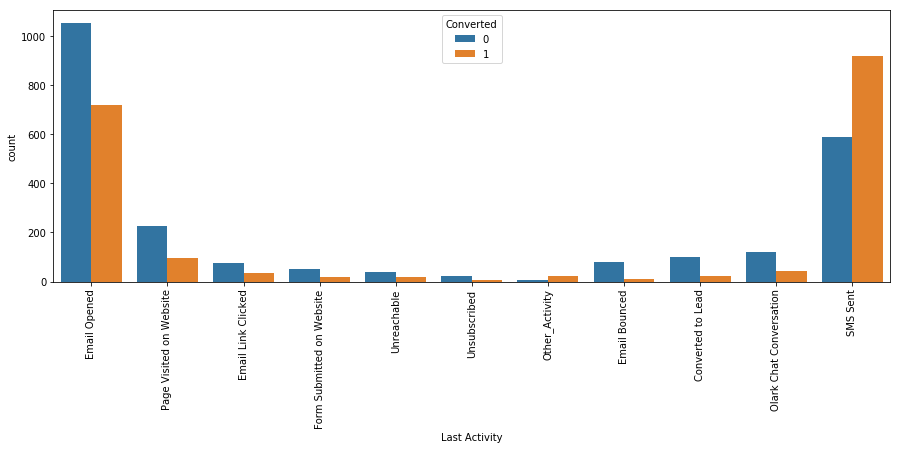

In [130]:
# Keeping considerable last activities as it is for now and club all others to "Other_Activity"
data['Last Activity'] = data['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = data)
xticks(rotation = 90)

Most of the lead have their Email opened as their last activity. Conversion rate for leads with last activity as SMS Sent is almost 60%.
Focus remains more on the Specialization with high conversion rate.
Inference Working Professionals going for the course have high chances of joining it. Unemployed leads are the most in numbers but has around 30-35% conversion rate.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

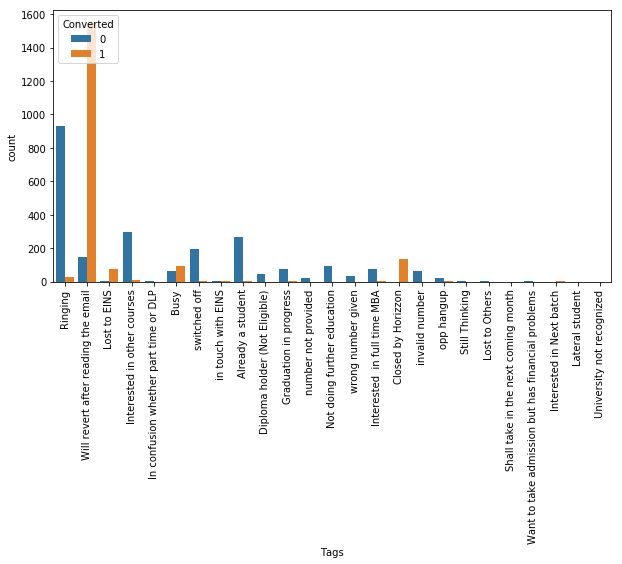

In [133]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Tags", hue = "Converted", data = data)
xticks(rotation = 90)

In [134]:
data = data.drop(['Lead Number','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country'],1)

In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4279 entries, 1 to 9239
Data columns (total 16 columns):
Prospect ID                        4279 non-null object
Lead Origin                        4279 non-null object
Lead Source                        4279 non-null object
Do Not Email                       4279 non-null object
Do Not Call                        4279 non-null object
Converted                          4279 non-null int64
TotalVisits                        4279 non-null float64
Total Time Spent on Website        4279 non-null int64
Page Views Per Visit               4279 non-null float64
Last Activity                      4279 non-null object
Specialization                     4279 non-null object
What is your current occupation    4279 non-null object
Tags                               4279 non-null object
Lead Quality                       4279 non-null object
City                               4279 non-null object
Last Notable Activity              4279 non-null obje

In [136]:
data = data.replace(to_replace =["no", 'yes', "No", "Yes"],  value =[0,1, 0,1])

In [138]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','Lead Quality','City','Last Notable Activity']], drop_first=True)
dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Lead Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
10,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
11,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [140]:
# Creating a master file 

leads_df = pd.concat([data, dummys], axis=1)
leads_df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.50,Email Opened,...,1,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.00,Email Opened,...,1,0,0,0,0,0,0,0,0,0
6,9fae7df4-169d-489b-afe4-0f3d752542ed,Landing Page Submission,Google,0,0,1,2.0,1640,2.00,Email Opened,...,0,0,0,1,0,0,0,0,0,0
10,2a369e35-ca95-4ca9-9e4f-9d27175aa320,Landing Page Submission,Organic Search,0,0,1,8.0,1351,8.00,Email Opened,...,1,0,0,0,0,0,0,0,0,0
11,9bc8ce93-6144-49e0-9f9d-080fc980f83c,Landing Page Submission,Direct Traffic,0,0,1,8.0,1343,2.67,Page Visited on Website,...,0,0,0,0,0,1,0,0,0,0


In [141]:
leads_df=leads_df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','Lead Quality','City','Last Notable Activity'],axis = 1)

In [142]:
# Setting up X variables

X = leads_df.drop(['Prospect ID','Converted'], axis=1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1,0,0,5.0,674,2.50,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.00,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6,0,0,2.0,1640,2.00,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
10,0,0,8.0,1351,8.00,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
11,0,0,8.0,1343,2.67,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [143]:
# Setting up Y variables

y = leads_df['Converted']
y.head()

1     0
2     1
6     1
10    1
11    1
Name: Converted, dtype: int64

In [144]:
# Train test spliltting 

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [145]:
# Scaling the variables

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

C:\Users\Leadics-16-1\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Leadics-16-1\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Leadics-16-1\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Leadics-16-1\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
5018,0,0,-0.098551,-1.157467,0.482159,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3006,0,0,0.369214,0.462987,1.124258,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
6583,0,0,-0.566316,-0.617316,-0.159939,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
6269,0,0,-1.034080,1.530812,-0.802038,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1338,0,0,-1.034080,-1.178859,-0.802038,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [146]:
# Running RFE to reduce the variables

logreg = LogisticRegression()

# running RFE with 15 variables as output

rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_train, y_train)

C:\Users\Leadics-16-1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Leadics-16-1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Leadics-16-1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Leadics-16-1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Leadics-16-1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 

In [147]:
rfe_support = list(zip(X_train.columns, rfe.support_, rfe.ranking_))
rfe_support

[('Do Not Email', True, 1),
 ('Do Not Call', False, 75),
 ('TotalVisits', False, 33),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 36),
 ('Lead Origin_Landing Page Submission', False, 42),
 ('Lead Origin_Lead Add Form', False, 23),
 ('Lead Source_Facebook', False, 78),
 ('Lead Source_Google', False, 31),
 ('Lead Source_Olark Chat', False, 34),
 ('Lead Source_Organic Search', False, 35),
 ('Lead Source_Other Lead Source', False, 48),
 ('Lead Source_Reference', False, 56),
 ('Lead Source_Referral Sites', False, 55),
 ('Lead Source_Welingak Website', False, 37),
 ('Last Activity_Email Bounced', False, 71),
 ('Last Activity_Email Link Clicked', False, 61),
 ('Last Activity_Email Opened', False, 44),
 ('Last Activity_Form Submitted on Website', False, 25),
 ('Last Activity_Olark Chat Conversation', False, 43),
 ('Last Activity_Other_Activity', False, 21),
 ('Last Activity_Page Visited on Website', False, 63),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activ

In [156]:
rfe_support_df = pd.DataFrame(rfe_support, columns =['Column', 'Support', 'Rank']) 
rfe_support_df.sort_values(by='Rank', ascending=False)

,Column,Support,Rank
93,Last Notable Activity_View in browser link Cli...,False,80
83,Last Notable Activity_Email Marked Spam,False,79
7,Lead Source_Facebook,False,78
85,Last Notable Activity_Email Received,False,77
79,City_Thane & Outskirts,False,76
1,Do Not Call,False,75
26,Specialization_E-Business,False,74
69,Tags_opp hangup,False,73
44,What is your current occupation_Other,False,72
15,Last Activity_Email Bounced,False,71


In [157]:
col = X_train.columns[rfe.support_]
print(col)

Index(['Do Not Email', 'Total Time Spent on Website', 'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Tags_wrong number given', 'Lead Quality_Not Sure',
       'Lead Quality_Worst', 'Last Notable Activity_Email Bounced'],
      dtype='object')


In [158]:
# Now looking at the model

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

C:\Users\Leadics-16-1\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 2995
Model:                            GLM   Df Residuals:                     2979
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -474.87
Date:                Mon, 25 Nov 2019   Deviance:                       949.74
Time:                        06:05:51   Pearson chi2:                 2.88e+03
No. Iterations:                    24   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.3881      0.307     -7.770      0.000      -2.991      -1.786
Do Not Email                                            -1.4326      0.399     -3.588      0.000      -2.215      -0.650
Total Time Spent on Website                              1.0739      0.095     11.255      0.000       0.887       1.261
Last Activity_SMS Sent                                   1.4750      0.199      7.400      0.000       1.084       1.866
What is your current occupation_Working Professional     1.3944      0.448      3.113      0.002       0.516       2.272
Tags_Busy                                                3.3277      0.375      8.878      0.000       2.593       4.062
Tags_Closed by Horizzon                                  7.0206      1.062      6.608      0.000       4.938       9.103
Tags_Interested in other courses                        -0.8296      0.532     -1.559      0.119      -1.873       0.214
Tags_Lost to EINS                                        6.1606      0.686      8.978      0.000       4.816       7.506
Tags_Ringing                                            -0.7516      0.363     -2.068      0.039      -1.464      -0.039
Tags_Will revert after reading the email                 4.6212      0.310     14.911      0.000       4.014       5.229
Tags_switched off                                      -22.6280   1.66e+04     -0.001      0.999   -3.26e+04    3.25e+04
Tags_wrong number given                                -22.8238   3.77e+04     -0.001      1.000    -7.4e+04    7.39e+04
Lead Quality_Not Sure                                   -1.3526      0.187     -7.250      0.000      -1.718      -0.987
Lead Quality_Worst                                      -3.1371      0.968     -3.240      0.001      -5.035      -1.239
Last Notable Activity_Email Bounced                      2.6087      1.101      2.370      0.018       0.452       4.766
========================================================================================================================
"""

In [162]:
col1=col.drop('Tags_Lost to EINS',1)

In [163]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 2995
Model:                            GLM   Df Residuals:                     2980
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -562.76
Date:                Mon, 25 Nov 2019   Deviance:                       1125.5
Time:                        06:06:39   Pearson chi2:                 2.67e+03
No. Iterations:                    24   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7870      0.199     -3.953      0.000      -1.177      -0.397
Do Not Email                                            -1.6156      0.377     -4.288      0.000      -2.354      -0.877
Total Time Spent on Website                              1.0410      0.085     12.290      0.000       0.875       1.207
Last Activity_SMS Sent                                   1.3024      0.180      7.223      0.000       0.949       1.656
What is your current occupation_Working Professional     1.4945      0.401      3.730      0.000       0.709       2.280
Tags_Busy                                                1.7290      0.288      6.012      0.000       1.165       2.293
Tags_Closed by Horizzon                                  5.3550      1.032      5.188      0.000       3.332       7.378
Tags_Interested in other courses                        -2.4414      0.481     -5.077      0.000      -3.384      -1.499
Tags_Ringing                                            -2.2837      0.283     -8.062      0.000      -2.839      -1.729
Tags_Will revert after reading the email                 3.0109      0.200     15.054      0.000       2.619       3.403
Tags_switched off                                      -24.1637   1.67e+04     -0.001      0.999   -3.28e+04    3.28e+04
Tags_wrong number given                                -24.3228   3.73e+04     -0.001      0.999   -7.31e+04     7.3e+04
Lead Quality_Not Sure                                   -1.2340      0.169     -7.295      0.000      -1.566      -0.902
Lead Quality_Worst                                      -3.8858      0.741     -5.242      0.000      -5.339      -2.433
Last Notable Activity_Email Bounced                      1.8860      0.894      2.111      0.035       0.135       3.637
========================================================================================================================
"""

In [167]:
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Lead Quality_Worst,2.39
9,Tags_switched off,1.95
8,Tags_Will revert after reading the email,1.92
2,Last Activity_SMS Sent,1.76
3,What is your current occupation_Working Profes...,1.26
1,Total Time Spent on Website,1.23
0,Do Not Email,1.22
4,Tags_Busy,1.21
10,Tags_wrong number given,1.19
6,Tags_Interested in other courses,1.18


In [168]:
# Predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:15]

5018    0.014667
3006    0.441105
6583    0.025455
6269    0.995092
1338    0.011480
4226    0.123660
6519    0.205367
1201    0.065874
7483    0.796074
1486    0.004091
8596    0.387991
8906    0.369776
7971    0.004342
2473    0.989287
1007    0.995946
dtype: float64

In [169]:
# Creating a data frame with the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head(10)

,Converted,Converted_prob,Prospect ID
5018,0,0.014667,5018
3006,1,0.441105,3006
6583,1,0.025455,6583
6269,1,0.995092,6269
1338,0,0.011480,1338
4226,0,0.123660,4226
6519,0,0.205367,6519
1201,0,0.065874,1201
7483,0,0.796074,7483
1486,0,0.004091,1486


In [170]:
# Creating new column 'predicted' Lead conversion Probaility > 0.8

y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.8 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
5018,0,0.014667,5018,0
3006,1,0.441105,3006,0
6583,1,0.025455,6583,0
6269,1,0.995092,6269,1
1338,0,0.011480,1338,0


In [171]:
# Confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[1598   39]
 [ 229 1129]]


In [173]:
# Checking the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9105175292153589


In [174]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [175]:
# sensitivity

TP / float(TP+FN)

0.8313696612665685

In [176]:
# positive predictive value 

print (TP / float(TP+FP))

0.9666095890410958


In [177]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8746579091406678


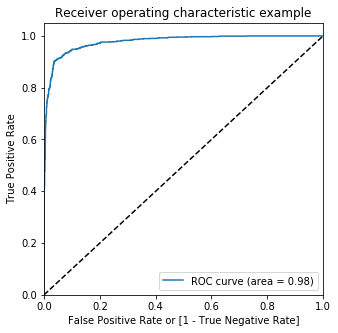

In [178]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

ROC curves are frequently used to show in a graphical way the connection/trade-off between clinical sensitivity and specificity for every possible cut-off for a test or a combination of tests. In addition the area under the ROC curve gives an idea about the benefit of using the test(s) in question.

It shows the tradeoff between sensitivity and specificity
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [180]:
# Optimal Cutoff Point
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
5018,0,0.014667,5018,0,1,0,0,0,0,0,0,0,0,0
3006,1,0.441105,3006,0,1,1,1,1,1,0,0,0,0,0
6583,1,0.025455,6583,0,1,0,0,0,0,0,0,0,0,0
6269,1,0.995092,6269,1,1,1,1,1,1,1,1,1,1,1
1338,0,0.011480,1338,0,1,0,0,0,0,0,0,0,0,0


In [181]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.453422  1.000000  0.000000
0.1   0.1  0.877129  0.976436  0.794746
0.2   0.2  0.902838  0.958027  0.857056
0.3   0.3  0.915526  0.948454  0.888210
0.4   0.4  0.921870  0.941826  0.905315
0.5   0.5  0.927880  0.927835  0.927917
0.6   0.6  0.933890  0.910162  0.953574
0.7   0.7  0.933556  0.896171  0.964569
0.8   0.8  0.910518  0.831370  0.976176
0.9   0.9  0.881135  0.751105  0.989004


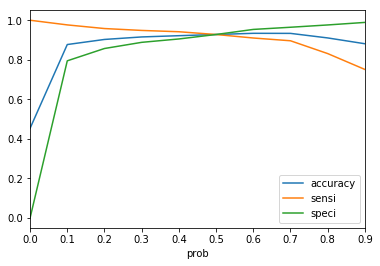

In [182]:
#Accuracy, Specificity and Sensitivity for various probablities

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [183]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.30 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
5018,0,0.014667,5018,0,1,0,0,0,0,0,0,0,0,0,0
3006,1,0.441105,3006,0,1,1,1,1,1,0,0,0,0,0,1
6583,1,0.025455,6583,0,1,0,0,0,0,0,0,0,0,0,0
6269,1,0.995092,6269,1,1,1,1,1,1,1,1,1,1,1,1
1338,0,0.011480,1338,0,1,0,0,0,0,0,0,0,0,0,0


In [184]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.915525876460768

In [185]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1454,  183],
       [  70, 1288]], dtype=int64)

In [186]:
# Sensitivity 

TP / float(TP+FN)

0.8313696612665685

In [187]:
# Specifity 

TN / float(TN+FP)

0.9761759315821625

In [188]:
# False Positive Rate

print(FP/ float(TN+FP))

0.023824068417837508


In [189]:
# Positive predictive value 

print (TP / float(TP+FP))

0.9666095890410958
